# Classification

---

### Key Idea:
- Classifying the **success probability** of an anime (rank, popularity, mean, positive_viewership_fraction) based on features of an anime
- We will create a new feature where top 500 ranking, or top 500 popularity, or high mean, or high positive_viewership_fraction as a **`successful` (Yes/No)**
- We will then classify whether an anime will be **`successful` (Yes/No)** according to certain metrics

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import json
import statistics
import math

from collections import defaultdict

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  # we only need pyplot

sb.set()  # set the default Seaborn style for graphics

import warnings
warnings.filterwarnings('ignore')

## The different classification models
The following models are inspired from [https://medium.datadriveninvestor.com/choosing-the-best-algorithm-for-your-classification-model-7c632c78f38f]

`Random Forest`
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier


`Support Vector Classification (SVC)`
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC


`Decision Tree Classifier`
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier


`XGBClassifier`
- https://xgboost.readthedocs.io/en/stable/python/python_api.html?highlight=xgbclassifier#xgboost.XGBClassifier


---
# Random Forest Classifier
Understand more about Random Forest Algorithm from <br>
[https://builtin.com/data-science/random-forest-algorithm] <br>
[https://www.kaggle.com/code/niklasdonges/end-to-end-project-with-python/notebook] <br>
[https://quantdare.com/decision-trees-gini-vs-entropy/]

## How it works
- An ensemble of decision trees
- Building multiple decision trees and merges them together to get a more accurate and stable prediction
- Random Forest adds additonal randomness to the model, while growing the trees
- Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features.
- Only a random subset of the features is taken into consideration by the algorithm for splitting a node
<br>

## Difference compared to Decision Trees
- Random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.
- "deep" decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets. Afterwards, it combines the subtrees. It's important to note this doesn’t work every time and it also makes the computation slower, depending on how many trees the random forest builds.
<br>

## Feature Importance
- Random forest algorithm is very easy to measure the relative importance of each feature on the prediction
  - Sklearn provides a great tool for this that measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity across all trees in the forest. It computes this score automatically for each feature after training and scales the results so the sum of all importance is equal to one.
<br>

## Advantages & Disadvantages
- Advantages
  - `Versatility` as it can be used for both regression and classification, and it's easy to view the relative importance it assigns to the input features
  - `Straight forward` and easy to understand hyperparameters
  - `No overfitting` if there are enough trees in the forest
- Disadvantages
  - Large number of trees can make the algorithm too slow and ineffective for real-time predictions
  - Algorithms are fast to train, but quite slow to create predictions once they are trained
  - Trade-off between `accuracy vs speed`
<br>

## Important Hyperparameters
The hyperparameters in random forest are either used to increase the predictive power of the model or to make the model faster. Let's look at the hyperparameters of sklearns built-in random forest function.

### 1. Increasing the predictive power

**`n_estimators`** hyperparameter
 - Which is just the **number of trees** the algorithm builds before taking the maximum voting or taking the averages of predictions. 
 - In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation.

**`max_features`** hyperparameter
- Which is the **maximum number of features** random forest considers to **split a node.**
- Sklearn provides several options, all described in the documentation.

**`min_sample_leaf`** hyperparameter
- This determines the **minimum number of leafs** required to **split an internal node.**

### 2. Increasing the model's speed

**`n_jobs`** hyperparameter
- Tells the engine **how many processors** it is allowed to use. 
- If it has a value of one, it can only use one processor. A value of “-1” means that there is no limit.

**`random_state`** hyperparameter
- Makes the **model’s output replicable.**
- The model will always produce the same results when it has a definite value of random_state and if it has been given the same hyperparameters and the same training data.

**`oob_score`** hyperparameter (also called oob sampling)
- Which is a random forest **cross-validation method.**
- In this sampling, about one-third of the data is not used to train the model and can be used to evaluate its performance. These samples are called the out-of-bag samples. It's very similar to the leave-one-out-cross-validation method, but almost no additional computational burden goes along with it.

---

## Import Random Forest Classifier

In [2]:
from sklearn.ensemble import RandomForestClassifier

## Importing the data

In [3]:
anime_df = pd.read_csv('dataset/anime_cleaned_2.csv')
print("Number of animes:", len(anime_df))
anime_df.head(1)

Number of animes: 8661


,id,title,start_date,end_date,synopsis,mean,rank,popularity,num_list_users,num_scoring_users,...,broadcast_day_of_the_week,broadcast_start_time,statistics_watching,statistics_completed,statistics_on_hold,statistics_dropped,statistics_plan_to_watch,statistics_num_list_users,positive_viewership_fraction,negative_viewership_fraction
0,95,Turn A Gundam,1999-04-09,2000-04-14,"It is the Correct Century, two millennia after...",7.71,1049,2892,40743,13338,...,friday,17:00,2735.0,16661.0,2538.0,1597.0,17292.0,40823.0,0.8987,0.1013


## Dropping non-essential columns to classification

In [4]:
anime_df.drop([
    'title', 'start_date', 'end_date', 'id', 'synopsis',
    'num_list_users', 'num_scoring_users', 'broadcast_day_of_the_week',
    'broadcast_start_time', 'statistics_watching', 'statistics_completed',
    'statistics_on_hold', 'statistics_dropped', 'statistics_plan_to_watch',
    'statistics_num_list_users', 'negative_viewership_fraction'
],
              axis=1,
              inplace=True)


In [5]:
anime_df.head(1)

,mean,rank,popularity,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,positive_viewership_fraction
0,7.71,1049,2892,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",1999.0,spring,0.8987


## Create new feature `success` to classify success of anime
- 0: Not Successful
- 1: Successful
  - Top 500 `rank`
  - Top 500 `popularity`
  - `mean`above 8.5
  - `positive_viewership_fraction` above 0.975

In [6]:
len(anime_df[anime_df['rank'] <= 500]['rank'])

986

In [7]:
len(anime_df[anime_df['positive_viewership_fraction'] >= 0.975]['positive_viewership_fraction'])

1246

In [8]:
# create 'success' column
anime_df['success'] = np.nan

for row in range(len(anime_df)):
    success = (anime_df['rank'][row] <= 500 or
              anime_df['popularity'][row] <= 500 or
              anime_df['mean'][row] >= 8.5 or
              anime_df['positive_viewership_fraction'][row] >= 0.975)
    
    if success:
        anime_df['success'][row] = 1
    else:
        anime_df['success'][row] = 0
    

In [9]:
anime_df.head()

,mean,rank,popularity,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,rating,studios,start_season_year,start_season_season,positive_viewership_fraction,success
0,7.71,1049,2892,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,pg_13,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",1999.0,spring,0.8987,0.0
1,8.07,472,4347,white,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,novel,1560,r,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na...",1999.0,fall,0.9479,1.0
2,7.74,976,2553,white,tv,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1787,manga,660,pg,"[{'id': 247, 'name': 'Shin-Ei Animation'}]",1979.0,spring,0.7589,0.0
3,8.63,66,26,white,tv,currently_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",0,manga,1440,pg_13,"[{'id': 18, 'name': 'Toei Animation'}]",1999.0,fall,0.7816,1.0
4,7.77,924,2135,white,movie,finished_airing,"[{'id': 2, 'name': 'Adventure'}, {'id': 4, 'na...",1,original,2460,pg,"[{'id': 18, 'name': 'Toei Animation'}]",2000.0,winter,0.9915,1.0


In [10]:
print("Number of not successful animes:", len(anime_df[anime_df['success'] == 0]['success']))
print("Number of successful animes:\t", len(anime_df[anime_df['success'] == 1]['success']))

Number of not successful animes: 6287
Number of successful animes:	 2374


## Unravel `genres` and `studios` from one column to multiple columns

In [11]:
from ipynb.fs.full.helpers import json_genres, json_studios

anime_df = json_genres(anime_df)  # convert genres column to json
anime_df = json_studios(anime_df)  # convert studios column to json

In [12]:
def unravel_genre_or_studio(row):
    res = pd.Series(dtype=str)
    for elem in row:
        res = res.append(pd.Series([elem['name']]))
    res.reset_index(inplace=True, drop=True)
    return res


genres_expanded = anime_df['genres'].apply(
    lambda row: unravel_genre_or_studio(row))
genres_expanded

,0,1,2,3,4,5,6,7,8,9,10
0,Action,Adventure,Drama,Mecha,Military,Romance,Sci-Fi,Space,NaN,NaN,NaN
1,Action,Drama,Military,Sci-Fi,Space,NaN,NaN,NaN,NaN,NaN,NaN
2,Adventure,Comedy,Fantasy,Kids,Sci-Fi,Shounen,NaN,NaN,NaN,NaN,NaN
3,Action,Adventure,Comedy,Drama,Fantasy,Shounen,Super Power,NaN,NaN,NaN,NaN
4,Adventure,Comedy,Kids,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8656,Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8657,Comedy,Slice of Life,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8658,Adventure,Comedy,Demons,Fantasy,Historical,Supernatural,NaN,NaN,NaN,NaN,NaN
8659,Music,Supernatural,Vampire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
genres_expanded = genres_expanded.fillna('NA')

In [14]:
studios_expanded = anime_df['studios'].apply(
    lambda row: unravel_genre_or_studio(row))
studios_expanded = studios_expanded.fillna('NA')
studios_expanded

,0,1,2,3,4,5,6,7,8,9
0,Sunrise,Nakamura Production,NA,NA,NA,NA,NA,NA,NA,NA
1,Artland,Magic Bus,NA,NA,NA,NA,NA,NA,NA,NA
2,Shin-Ei Animation,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,Toei Animation,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,Toei Animation,NA,NA,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...
8656,Doga Kobo,NA,NA,NA,NA,NA,NA,NA,NA,NA
8657,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8658,Sunrise,NA,NA,NA,NA,NA,NA,NA,NA,NA
8659,A-1 Pictures,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [15]:
anime_expanded_df = anime_df.copy()
for index, row in genres_expanded.iterrows():
    for i in genres_expanded.columns:
        anime_expanded_df.loc[index, f"genre-{i}"] = genres_expanded.iloc[index, i]
for index, row in studios_expanded.iterrows():
    for i in studios_expanded.columns:
        anime_expanded_df.loc[index, f"studio-{i}"] = studios_expanded.iloc[index, i]


In [16]:
anime_expanded_df.head(2)

,mean,rank,popularity,nsfw,media_type,status,genres,num_episodes,source,average_episode_duration,...,studio-0,studio-1,studio-2,studio-3,studio-4,studio-5,studio-6,studio-7,studio-8,studio-9
0,7.71,1049,2892,white,tv,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,original,1445,...,Sunrise,Nakamura Production,NA,NA,NA,NA,NA,NA,NA,NA
1,8.07,472,4347,white,ova,finished_airing,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,novel,1560,...,Artland,Magic Bus,NA,NA,NA,NA,NA,NA,NA,NA


### Encoding nominal (unordered) categorical variables using `OneHotEncoding`

Our dataset contains a lot of categorical variables such as:
- media_type
- source
- rating
- start_season_season
- start_season_year
- status
- nsfw
- genres
- studios

In [17]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
cat_variables = [
    'media_type', 'source', 'rating', 'start_season_season',
    'start_season_year', 'status', 'nsfw'
] + [f"genre-{i}" for i in genres_expanded.columns] + [f"studio-{i}" for i in studios_expanded.columns]
anime_cat = anime_expanded_df[cat_variables]

ohe.fit(anime_cat)
anime_cat_ohe = pd.DataFrame(ohe.transform(anime_cat).toarray(),
                             columns=ohe.get_feature_names(anime_cat.columns))

# Check the encoded variables
anime_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Columns: 917 entries, media_type_movie to studio-9_Steve N' Steven
dtypes: float64(917)
memory usage: 60.6 MB


In [18]:
num_variable = []
for i in anime_df:
    if i not in cat_variables:
        num_variable.append(i)
num_variable

['mean',
 'rank',
 'popularity',
 'genres',
 'num_episodes',
 'average_episode_duration',
 'studios',
 'positive_viewership_fraction',
 'success']

In [19]:
# Combining Numeric features with the OHE Categorical features
animeData_num = anime_df[num_variable]
animeData_ohe = pd.concat([animeData_num, anime_cat_ohe],
                          sort=False,
                          axis=1).reindex(index=animeData_num.index)

# Check the final dataframe
animeData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Columns: 926 entries, mean to studio-9_Steve N' Steven
dtypes: float64(920), int64(4), object(2)
memory usage: 61.2+ MB


In [20]:
animeData_ohe.head(2)

,mean,rank,popularity,genres,num_episodes,average_episode_duration,studios,positive_viewership_fraction,success,media_type_movie,...,studio-5_Trigger,studio-6_Graphinica,studio-6_NA,studio-6_Science SARU,studio-7_NA,studio-7_Studio Colorido,studio-8_NA,studio-8_Sola Digital Arts,studio-9_NA,studio-9_Steve N' Steven
0,7.71,1049,2892,"[{'id': 1, 'name': 'Action'}, {'id': 2, 'name'...",50,1445,"[{'id': 14, 'name': 'Sunrise'}, {'id': 1260, '...",0.8987,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,8.07,472,4347,"[{'id': 1, 'name': 'Action'}, {'id': 8, 'name'...",28,1560,"[{'id': 8, 'name': 'Artland'}, {'id': 207, 'na...",0.9479,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [21]:
# All the columns
for col in animeData_ohe.columns:
    print(col)

mean
rank
popularity
genres
num_episodes
average_episode_duration
studios
positive_viewership_fraction
success
media_type_movie
media_type_music
media_type_ona
media_type_ova
media_type_special
media_type_tv
source_4_koma_manga
source_book
source_card_game
source_digital_manga
source_game
source_light_novel
source_manga
source_mixed_media
source_music
source_novel
source_original
source_other
source_picture_book
source_radio
source_unknown
source_visual_novel
source_web_manga
source_web_novel
rating_g
rating_no_rating
rating_pg
rating_pg_13
rating_r
rating_r+
start_season_season_fall
start_season_season_spring
start_season_season_summer
start_season_season_winter
start_season_year_1969.0
start_season_year_1979.0
start_season_year_1988.0
start_season_year_1992.0
start_season_year_1993.0
start_season_year_1994.0
start_season_year_1995.0
start_season_year_1996.0
start_season_year_1997.0
start_season_year_1998.0
start_season_year_1999.0
start_season_year_2000.0
start_season_year_2001.0
sta

studio-0_PP Project
studio-0_PPM
studio-0_PRA
studio-0_Palm Studio
studio-0_Pancake
studio-0_Panda Factory
studio-0_Paper Animation
studio-0_Paper Plane Animation Studio
studio-0_Passione
studio-0_Pastel
studio-0_Pb Animation Co. Ltd.
studio-0_Phoenix Entertainment
studio-0_Picture Magic
studio-0_Pie in the sky
studio-0_Pierrot Plus
studio-0_Pine Jam
studio-0_Planet
studio-0_Planet Cartoon
studio-0_Platinum Vision
studio-0_Plum
studio-0_Plus Heads
studio-0_Point Pictures
studio-0_Polygon Pictures
studio-0_Pops Inc.
studio-0_PrimeTime
studio-0_Production I.G
studio-0_Production IMS
studio-0_Production Reed
studio-0_Project No.9
studio-0_Qualia Animation
studio-0_RG Animation Studios
studio-0_Rabbit Machine
studio-0_Radix
studio-0_Revoroot
studio-0_Rikuentai
studio-0_Rising Force
studio-0_Robot Communications
studio-0_Rockwell Eyes
studio-0_Ruo Hong Culture
studio-0_SANZIGEN
studio-0_SBS TV Production
studio-0_SILVER LINK.
studio-0_Saigo no Shudan
studio-0_Satelight
studio-0_Science SARU

---
# Metrics to measure performance

In [22]:
def model_performance(random_forest, X_train, X_test, y_train, y_test):
    # Import libraries
    from sklearn.model_selection import cross_val_predict
    from sklearn.model_selection import cross_val_score
    
    # K-Fold Cross Validation
    y_train_pred = cross_val_predict(random_forest, X_train, y_train, cv=5)
    y_test_pred = cross_val_predict(random_forest, X_test, y_test, cv=5)
    
    train_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring = "accuracy")
    test_scores = cross_val_score(random_forest, X_test, y_test, cv=5, scoring = "accuracy")
    
    # Performance metrics
    #confusion_matrix_TPR_TNR(y_train, y_test, y_train_pred, y_test_pred, train_scores, test_scores)
    
    
    
    print("-> Train Dataset")
    confusion_matrix_TPR_TNR(y_train, y_train_pred, train_scores, "Train")
    get_precision_recall(y_train, y_train_pred)
    get_f1_score(y_train, y_train_pred)

    print("\n\n-----\n-> Test Dataset")
    confusion_matrix_TPR_TNR(y_test, y_test_pred, test_scores, "Test")
    get_precision_recall(y_test, y_test_pred)
    get_f1_score(y_test, y_test_pred)
    ROC_AUC(random_forest, X_test, y_test, "Test")
    print('-----\n')
    
    try:
        get_oob_score(random_forest)
    except:
        pass
    

## Confusion Matrix:
- True Positive Rate
- True Negative Rate
We are looking at the TPR and TNR because we want to know how confident are we with the result of the classification

In [23]:
def confusion_matrix_TPR_TNR(y, y_pred, scores, train_test_string):
    from sklearn.metrics import confusion_matrix
    
    # Confusion Matrix
    c_matrix = confusion_matrix(y, y_pred)

    # True Negatives & True Positives
    TN = c_matrix[0][0]
    FP = c_matrix[1][0]
    FN = c_matrix[0][1]
    TP = c_matrix[1][1]

    # True Positive Rate and True Negative Rate
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)

    # Check the Goodness of Fit (on Train Data)
    print(f"Goodness of Fit of Model ({train_test_string} Dataset)")
    print("Classification Accuracy:", scores.mean())
    print("True Positive Rate:", TPR)
    print("True Negative Rate:", TNR)

    # Plot the Confusion Matrix
    plt.figure(figsize=(8, 8))
    sb.heatmap(c_matrix, 
               annot = True, 
               fmt=".0f", 
               annot_kws={"size": 18}).set(title=f"Confusion Matrix ({train_test_string} Dataset)")
    print()

## Precision and Recall:
- `Precision`: Probability of predicting positive correctly (Positive Predictive Value) -> TP/(TP+FP)
- `Recall` (True Positive Rate)

In [24]:
def get_precision_recall(y, y_pred):
    from sklearn.metrics import precision_score, recall_score
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print("Precision:", precision)
    print("Recall:", recall)
    
    return [precision, recall]

## F-score
- Take into account both precision and recall, with more weight assigned to the lower value

In [25]:
def get_f1_score(y, y_pred):
    from sklearn.metrics import f1_score
    
    f1 = f1_score(y, y_pred)
    
    print("f1_score:", f1)
    
    return f1

## Out-of-bag (oob) score

In [26]:
def get_oob_score(random_forest):
    print("oob score:", round(random_forest.oob_score_ * 100, 2), "%")

## ROC AUC Curve
- Curve plots TPR (recall) vs FPR
- The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC
- A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.


- The red line in the middle represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible

In [27]:
def ROC_AUC(random_forest, X_train, y_train, train_test):
    try:
        # getting the probabilities of our predictions
        y_scores = random_forest.predict_proba(X_train)
        y_scores = y_scores[:,1]

        from sklearn.metrics import roc_curve
        # compute true positive rate and false positive rate
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)

        # plotting them against each other
        def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
            plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
            plt.plot([0, 1], [0, 1], 'r', linewidth=4)
            plt.axis([0, 1, 0, 1])
            plt.xlabel('False Positive Rate (FPR)', fontsize=16)
            plt.ylabel('True Positive Rate (TPR)', fontsize=16)
            plt.title(f'{train_test} Dataset')

        plt.figure(figsize=(14, 7))
        plot_roc_curve(false_positive_rate, true_positive_rate)
        plt.show()


        # ROC AUC Score
        from sklearn.metrics import roc_auc_score
        r_a_score = roc_auc_score(y_train, y_scores)
        print("ROC-AUC-Score:", r_a_score)
    except:
        pass

---
# 1. Decision Tree Classifier
- Let's test the decision tree classifier first before moving on to Random Forest Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios'], axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_test_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_decision_tree, 2), "%")

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_decision_tree, 2), "%")

Train accuracy: 100.0 %
Test accuracy: 84.22 %


-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.8330556757242089
True Positive Rate: 0.6963657678780774
True Negative Rate: 0.8939393939393939

Precision: 0.6963657678780774
Recall: 0.72
f1_score: 0.7079856972586411


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.810316436934934
True Positive Rate: 0.6642547033285094
True Negative Rate: 0.8611111111111112

Precision: 0.6642547033285094
Recall: 0.6339779005524862
f1_score: 0.6487632508833923


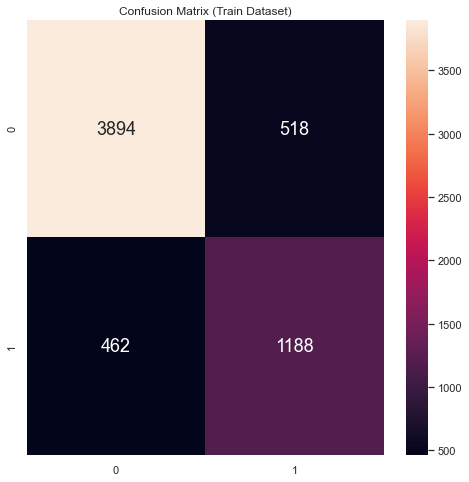

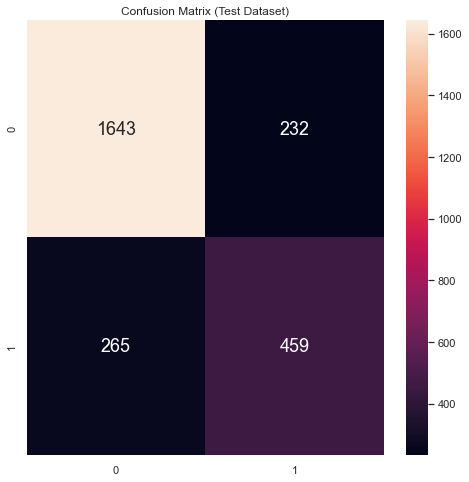

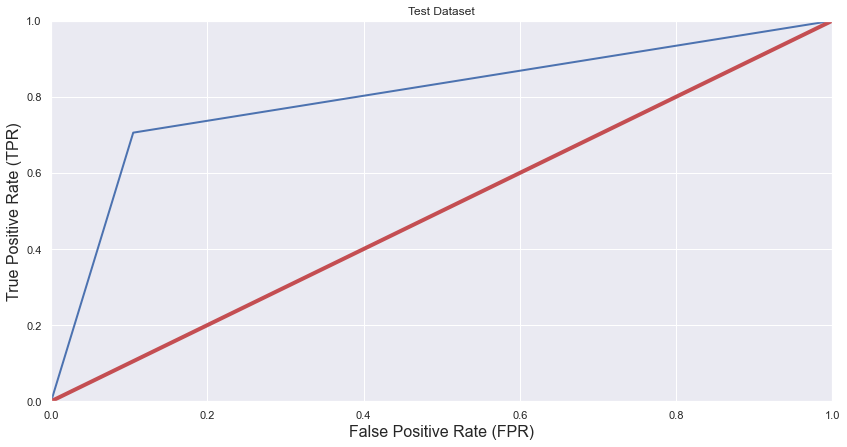

ROC-AUC-Score: 0.8003672191528546
-----



In [32]:
# test model performance with K-Fold Cross Validation (k=5)
model_performance(decision_tree, X_train, X_test, y_train, y_test)

**Conclusion:**
- Train:
  - Low Classification accuracy, TPR, and f1_score
- Test:
  - Low Classification accuracy, TPR, and f1_score
  - Low `ROC-AUC Score` (0.800)


### Let's use a better model: `Random Forest Classfier`

---
# 2. Random Forest Classifier (V1)
- Using all features

In [33]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios'], axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [34]:
print("Length")
print(f"X_train:\t {len(X_train)}")
print(f"X_test: \t {len(X_test)}")
print(f"y_train:\t {len(y_train)}")
print(f"y_test: \t {len(y_test)}")

Length
X_train:	 6062
X_test: 	 2599
y_train:	 6062
y_test: 	 2599


In [35]:
X_train.head(3)

,num_episodes,average_episode_duration,media_type_movie,media_type_music,media_type_ona,media_type_ova,media_type_special,media_type_tv,source_4_koma_manga,source_book,...,studio-5_Trigger,studio-6_Graphinica,studio-6_NA,studio-6_Science SARU,studio-7_NA,studio-7_Studio Colorido,studio-8_NA,studio-8_Sola Digital Arts,studio-9_NA,studio-9_Steve N' Steven
7928,13,1490,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8031,0,300,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7148,1,281,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [36]:
y_train.head(3)

,success
7928,0.0
8031,0.0
7148,0.0


In [37]:
# Random Forest
random_forest_v1 = RandomForestClassifier(n_estimators=100, oob_score=True)
random_forest_v1.fit(X_train, y_train)

y_pred = random_forest_v1.predict(X_test)

random_forest_v1.score(X_train, y_train)
acc_random_forest_v1 = round(random_forest_v1.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest_v1, 2), "%")


acc = accuracy_score(y_test, y_pred)
print(f"Accuracy of {random_forest_v1} is {acc}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix of {random_forest_v1} is {cm}")

100.0 %
Accuracy of RandomForestClassifier(oob_score=True) is 0.8799538283955367
Confusion Matrix of RandomForestClassifier(oob_score=True) is [[1784   71]
 [ 241  503]]


In [38]:
acc_random_forest_v1 = round(random_forest_v1.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_random_forest_v1, 2), "%")

acc_random_forest_v1 = round(random_forest_v1.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_random_forest_v1, 2), "%")

Train accuracy: 100.0 %
Test accuracy: 88.0 %


## K-Fold Cross Validation:
- **K=5**

In [40]:
scores = cross_val_score(random_forest_v1, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.87881286 0.87881286 0.86633663 0.89026403 0.8869637 ]
Mean: 0.8802380155575327
Standard Deviation: 0.008283311261719373


## Test performance of `random_forest_v1` using confusion matrix, precision, recall, and f-scores

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.8812277064474792
True Positive Rate: 0.8696356275303644
True Negative Rate: 0.8848145846281334

Precision: 0.8696356275303644
Recall: 0.6588957055214724
f1_score: 0.7497382198952879


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.8464784348599377
True Positive Rate: 0.8163265306122449
True Negative Rate: 0.8524271844660194

Precision: 0.8163265306122449
Recall: 0.5913978494623656
f1_score: 0.6858924395947


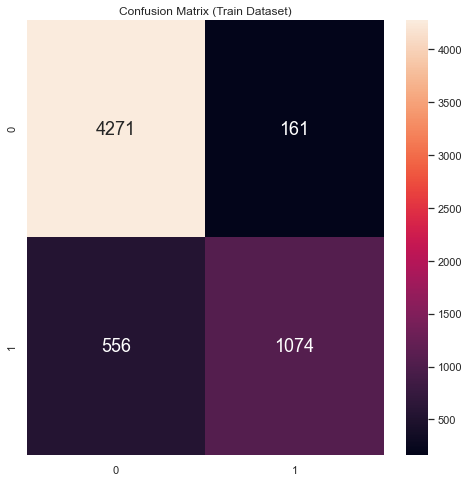

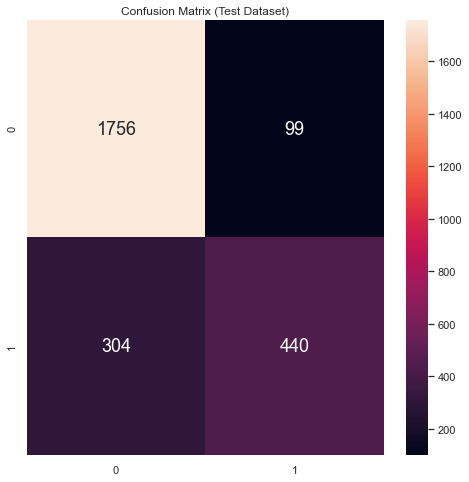

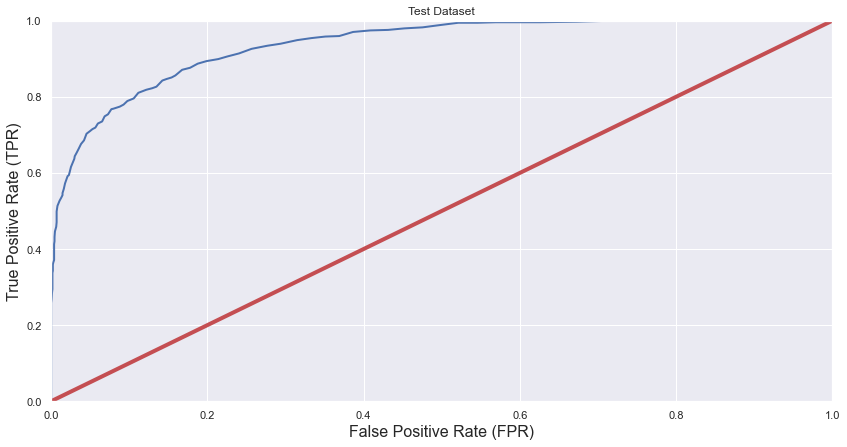

ROC-AUC-Score: 0.9367265165347941
-----

oob score: 88.4 %


In [41]:
model_performance(random_forest_v1, X_train, X_test, y_train, y_test)

**Conclusion (random_forest_v1 vs decision_tree):**
- Train:
  - Improved Classification accuracy, TPR, and f1_score
- Test:
  - Improved Classification accuracy, TPR, and f1_score
  - Increased in `ROC-AUC Score` (0.800 to ~0.94)

<br>

**Reason for change:**
- An ensemble of decision trees
- Building multiple decision trees and merges them together to get a more accurate and stable prediction
- Random Forest adds additonal randomness to the model, while growing the trees
- Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features.
- Random forest algorithm randomly selects observations and features to build several decision trees and then averages the results.
- "deep" decision trees might suffer from overfitting. Most of the time, random forest prevents this by creating random subsets of the features and building smaller trees using those subsets. Afterwards, it combines the subtrees. It's important to note this doesn’t work every time and it also makes the computation slower, depending on how many trees the random forest builds.



- Lets improve the random forest's performance even more by looking at **feature importance**
<br>

---
# Feature Importance:
- Sklearn measure features importance by looking at how much the tree nodes, that use that feature and reduce impurity on average (across all trees in the forest). 
- The score is scaled such that the sum of all important feature is equal to 1.

In [45]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest_v1.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).reset_index(drop=True)

In [46]:
importances.head(15)

,feature,importance
0,average_episode_duration,0.075
1,num_episodes,0.048
2,source_manga,0.021
3,media_type_movie,0.019
4,rating_pg_13,0.018
5,media_type_tv,0.015
6,rating_pg,0.014
7,genre-4_NA,0.014
8,start_season_season_spring,0.014
9,rating_r,0.013


<AxesSubplot:xlabel='feature'>

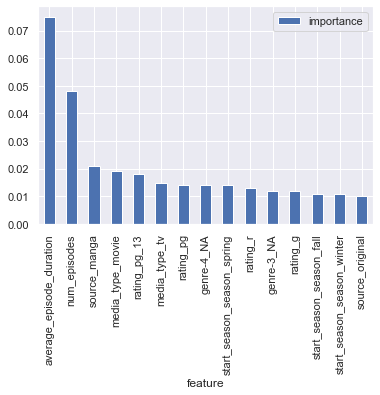

In [47]:
importances.head(15).plot.bar(x='feature', y='importance')

### Features with zero importance:

In [48]:
importances.tail(15)

,feature,importance
904,studio-0_G-angle,0.0
905,studio-0_GEEK TOYS,0.0
906,studio-0_Gaina,0.0
907,studio-0_Gainax Kyoto,0.0
908,studio-0_Gathering,0.0
909,studio-0_Geno Studio,0.0
910,studio-0_GoHands,0.0
911,studio-0_Graphinica,0.0
912,studio-0_Green Monster Team,0.0
913,studio-0_Group TAC,0.0


In [49]:
zero_importance_features = []
for row in range(len(importances)):
    if importances['importance'][row] == 0:
        zero_importance_features.append(importances['feature'][row])
        
print('Number of features with 0 importance:', len(zero_importance_features))
print('Number of features with some importance:', len(importances) - len(zero_importance_features))

Number of features with 0 importance: 650
Number of features with some importance: 269


**Note:**
- **600+** features does not play a significant role in the random forest classifier prediction process.
- Thus, they can be dropped from the dataset that is used to train the classifier

---
# 3. Random Forest Classifier (V2)
- Dropped features with 0 importances

In [50]:
cols_to_drop = ['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios']
cols_to_drop.extend([col for col in zero_importance_features])
cols_to_drop

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(cols_to_drop, axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
X_train.head(3)

,num_episodes,average_episode_duration,media_type_movie,media_type_music,media_type_ona,media_type_ova,media_type_special,media_type_tv,source_4_koma_manga,source_game,...,studio-0_feel.,studio-0_ufotable,studio-1_A-1 Pictures,studio-1_MAPPA,studio-1_Madhouse,studio-1_NA,studio-1_Satelight,studio-1_Studio Signpost,studio-1_Trans Arts,studio-2_NA
1119,1,1415,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1487,26,1500,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3930,358,1434,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [56]:
# Random Forest
random_forest_v2 = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest_v2.fit(X_train, y_train)

y_pred = random_forest_v2.predict(X_test)

random_forest_v2.score(X_train, y_train)
acc_random_forest_v2 = round(random_forest_v2.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest_v2,2,), "%")


acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(random_forest_v2, acc))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of %s is %s"%(random_forest_v2, cm))

99.98 %
Accuracy of RandomForestClassifier(oob_score=True) is 0.8876490958060793
Confusion Matrix of RandomForestClassifier(oob_score=True) is [[1807   70]
 [ 222  500]]


In [57]:
acc_random_forest_v2 = round(random_forest_v2.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_random_forest_v2, 2), "%")

acc_random_forest_v2 = round(random_forest_v2.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_random_forest_v2, 2), "%")

Train accuracy: 99.98 %
Test accuracy: 88.76 %


### K-Fold Cross Validation:
- **K=5**

In [59]:
scores = cross_val_score(random_forest_v2, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.88540808 0.88128607 0.87706271 0.88613861 0.87623762]
Mean: 0.8812266181276
Standard Deviation: 0.004094974463354793


## Test performance of `random_forest_v2` using confusion matrix, precision, recall, and f-scores

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.8785870343011218
True Positive Rate: 0.8598425196850393
True Negative Rate: 0.8831385642737897

Precision: 0.8598425196850393
Recall: 0.6610169491525424
f1_score: 0.7474332648870635


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.8630287535200829
True Positive Rate: 0.8403041825095057
True Negative Rate: 0.8649300530631935

Precision: 0.8403041825095057
Recall: 0.6121883656509696
f1_score: 0.7083333333333334


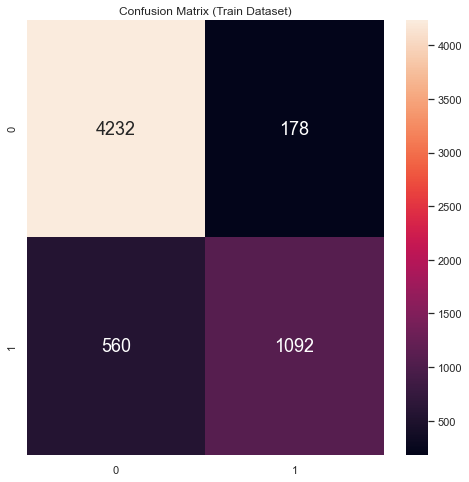

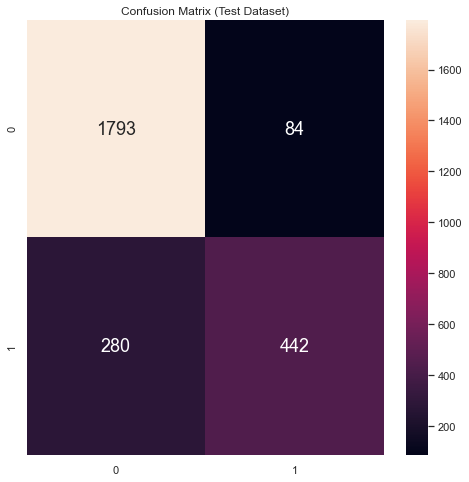

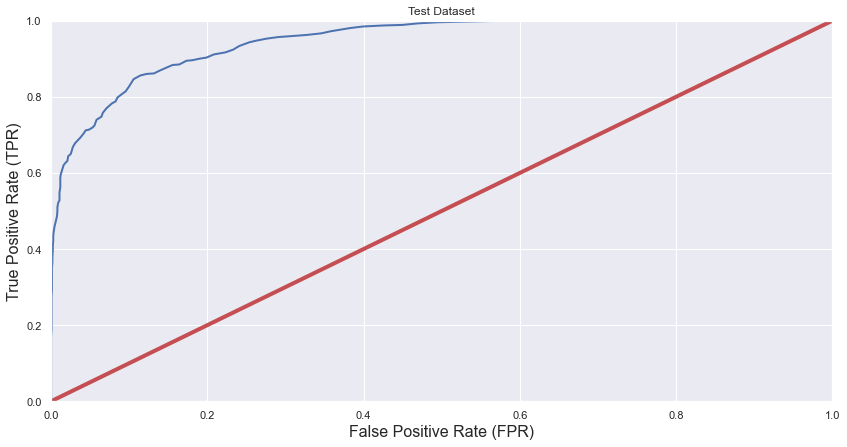

ROC-AUC-Score: 0.9467519041554198
-----

oob score: 88.16 %


In [60]:
model_performance(random_forest_v2, X_train, X_test, y_train, y_test)

**V2 Conclusion:**
- Test Dataset:
  - Performance much more consistent (s.d. 0.00409)
  - Higher classification accuracy, TPR, TNR, and f1 score
  - ROC-AUC-Score increased
- Performance `speed` is increased
- oob score remains relatively the same

**Reason for change:**
- Reducing number of features reduce the dimensionals of the dataset and hence the dimensionality of the model, thus speeding up the model and improve the performance since only important features are considered.
- Reducing number of features also prevents overfitting, however since random forest is used, overfitting is not likely to occur, thus the performance of this model only increase slightly

---
# 4. Random Forest Classifier (V3)
- Using top 50 important features

In [67]:
# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe[list(importances['feature'].head(50))]) # Top 50 important features

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [69]:
# Random Forest
random_forest_v3 = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest_v3.fit(X_train, y_train)

y_pred = random_forest_v3.predict(X_test)

random_forest_v3.score(X_train, y_train)
acc_random_forest_v3 = round(random_forest_v3.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest_v3, 2), "%")

acc = accuracy_score(y_test, y_pred)
print("Accuracy of %s is %s"%(random_forest_v3, acc))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix of %s is %s"%(random_forest_v3, cm))

99.98 %
Accuracy of RandomForestClassifier(oob_score=True) is 0.8787995382839554
Confusion Matrix of RandomForestClassifier(oob_score=True) is [[1780   88]
 [ 227  504]]


In [70]:
acc_random_forest_v3 = round(random_forest_v3.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_random_forest_v3, 2), "%")

acc_random_forest_v3 = round(random_forest_v3.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_random_forest_v3, 2), "%")

Train accuracy: 99.98 %
Test accuracy: 87.88 %


### K-Fold Cross Validation:
- **K=5**

In [71]:
scores = cross_val_score(random_forest_v3, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.86479802 0.85078318 0.86221122 0.87128713 0.86138614]
Mean: 0.8620931384152429
Standard Deviation: 0.0066373903265731235


## Test performance of `random_forest_v3` using confusion matrix, precision, recall, and f-scores

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.862422627258604
True Positive Rate: 0.7997021593447505
True Negative Rate: 0.879423606696334

Precision: 0.7997021593447505
Recall: 0.6536822884966524
f1_score: 0.7193569993302077


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.841476211649622
True Positive Rate: 0.7504105090311987
True Negative Rate: 0.8623115577889447

Precision: 0.7504105090311987
Recall: 0.625170998632011
f1_score: 0.682089552238806


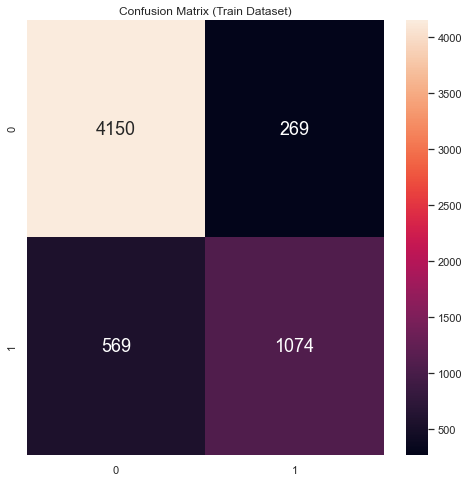

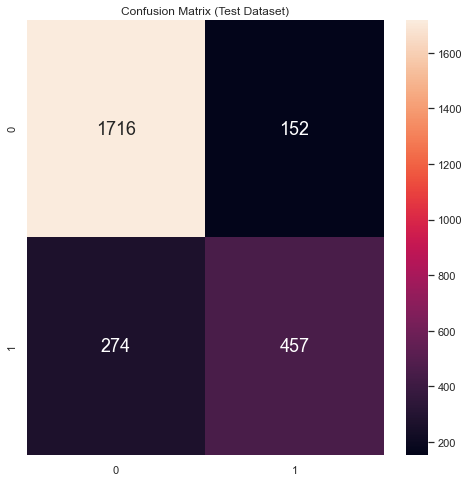

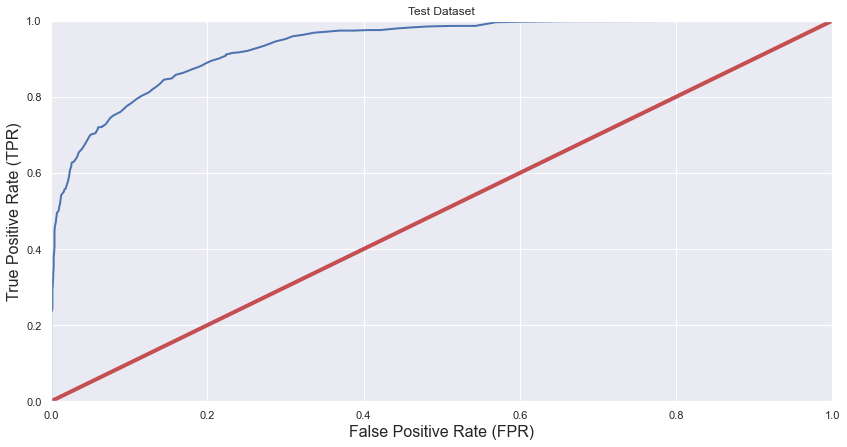

ROC-AUC-Score: 0.935843656719697
-----

oob score: 86.7 %


In [72]:
model_performance(random_forest_v3, X_train, X_test, y_train, y_test)

**V3 Conclusion:**
- Classification accuracy decreased slightly
- Performance consistency dropped (s.d. increased)
- `Precision`, `Recall`, and `f1_score` dropped slightly
- `oob score` dropped slightly (worse among the 3 versions)
- `ROC-AUC-Score` decreased (worse among the 3 versions)


- However, performance `speed` increased even more


- Therefore, reducing large number of features reduces the performance but increases the speed

**Reason for change:**
- Performance speed is increased because the number of features used has decreased significantly -> Lesser number of features to consider before splitting a node
- Performance dropped slightly because only top 50 important features are used -> There are over 250 features that are important -> Thus only using 50 important features reduce the classification accuracy -> However, model speed is boosted since lesser number of features to consider before splitting a node

<br>

---
# Hyperparameter Tuning
- Using `GridSearchCV` to find the best hyperparameters: `criterion`, `min_samples_leaf`, `min_samples_split`, `n_estimators`
- Only include features that have importance (i.e. importance != 0)

In [73]:
cols_to_drop = ['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios']
cols_to_drop.extend([col for col in zero_importance_features])
cols_to_drop

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(cols_to_drop, axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Code written in markdown since it takes a long time to run the tuning process:

> param_grid = { 
    "criterion" : ["gini", "entropy"], 
    "min_samples_leaf" : [1, 5, 10, 25, 50, 70],
    "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
    "n_estimators": [100, 400, 700, 1000, 1500]
}

> from sklearn.model_selection import GridSearchCV, cross_val_score


> rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

> clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

> clf.fit(X_train, y_train)

> clf.best_params_

In [84]:
# Output of the hyperparameter tuning
best_params_ = {
    'criterion': 'entropy',
    'min_samples_leaf': 1,
    'min_samples_split': 4,
    'n_estimators': 700
}

best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 700}

**Hyperparameter Tuning Output:**

{`'criterion'`: 'entropy',<br>
 `'min_samples_leaf'`: 1,<br>
 `'min_samples_split'`: 4,<br>
 `'n_estimators'`: 700}
 
**Reason for change:**
- n_estimators: the number of trees the algorithm builds before taking the maximum voting or taking the averages of prediction (default is 100)
  - Build more trees -> Better performance
- criterion (how to split the tree by measuring impurity of a node):
  - `gini`: range [0, 0.5], measures the frequency at which any element of the dataset will be mislabelled when it is randomly labeled. The optimum split is chosen by the features with less Gini Index
  - `entropy`: range [0, 1], measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy
    - `entropy` is better suited to the dataset.


- By undergoing hyperparameter tuning, we can control the behavior of the model. If we don’t correctly tune our hyperparameters, our model parameters will produce suboptimal results as they don’t minimize the loss function, thus the model makes more errors
- Hence, hyperparameter tuning maximises the model performance

---
# 5. Random Forest Classifier (V4)
- After Hyperparameter Tuning
- Using model 2 features

### Test new parameters:

In [106]:
cols_to_drop = ['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios']
cols_to_drop.extend([col for col in zero_importance_features])
cols_to_drop

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(cols_to_drop, axis=1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [107]:
random_forest_v4 = RandomForestClassifier(criterion = "entropy", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 4, 
                                       n_estimators=700, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest_v4.fit(X_train, y_train)
y_prediction = random_forest_v4.predict(X_test)

print(random_forest_v4.score(X_train, y_train))

print("oob score:", round(random_forest_v4.oob_score_, 4)*100, "%")

0.9932365555922138
oob score: 88.8 %


In [108]:
acc_random_forest_v4 = round(random_forest_v4.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_random_forest_v4, 2), "%")

acc_random_forest_v4 = round(random_forest_v4.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_random_forest_v4, 2), "%")

Train accuracy: 99.32 %
Test accuracy: 89.15 %


### K-Fold Cross Validation:
- **K=5**

In [111]:
scores = cross_val_score(random_forest_v4, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.88304204 0.88469085 0.90191419 0.88788779 0.88871287]
Mean: 0.8892495490274502
Standard Deviation: 0.004661087566371556


## Test performance of `random_forest_v4` using confusion matrix, precision, recall, and f-scores

-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.8792495490274502
True Positive Rate: 0.861244019138756
True Negative Rate: 0.8839434276206323

Precision: 0.861244019138756
Recall: 0.6593406593406593
f1_score: 0.7468879668049794


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.8518734252260265
True Positive Rate: 0.8305084745762712
True Negative Rate: 0.8573500967117988

Precision: 0.8305084745762712
Recall: 0.5991847826086957
f1_score: 0.6961325966850828


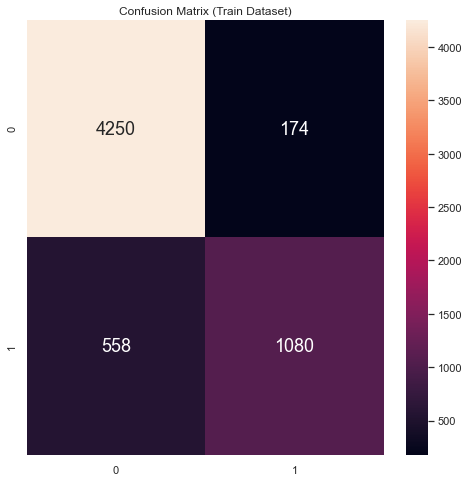

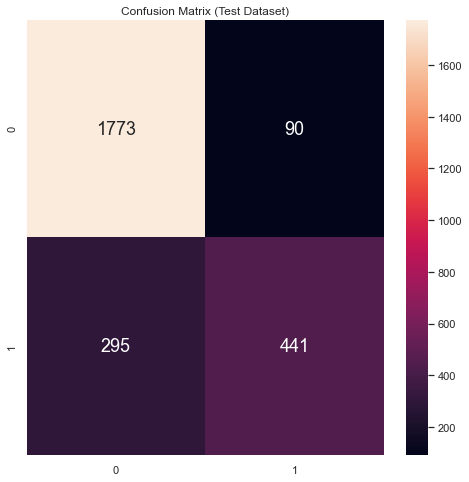

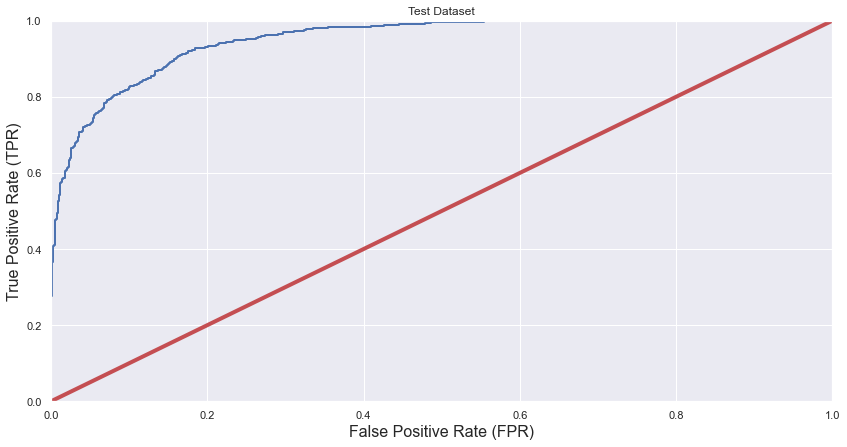

ROC-AUC-Score: 0.9502343987024202
-----

oob score: 88.8 %


In [112]:
model_performance(random_forest_v4, X_train, X_test, y_train, y_test)

**V4 Conclusion:**
- More consistent performance (even lower s.d. of classification accuracy compared to all previous versions)
- `oob_score` is the highest
- Performance on `train` dataset is similar to v1 and v2
- **Performance on `test` dataset has improved (the best among all versions):**
  - Classification Accuracy increased
  - TPR & TNR about the same
  - Precision, Recall, and f1_score has slightly increased
  - ROC-AUC-Score slightly increased

- oob_score slightly increased
- **Performance `speed` is between v1 and v2**


---
# We will use `random_forest_v4 model`
- Best performance metrics scores on test dataset among all versions
- And performance speed is between v1 and v2

In [113]:
# Single sample prediction
single_anime_data = pd.DataFrame(X_test.loc[1166]).transpose()

if (random_forest_v4.predict(single_anime_data)[0]):
    print('Will be a Success! :)')
else:
    print('Will not be a sucesss. :(')

Will be a Success! :)


In [114]:
# 15 sample predictions
for index in list(X_test.index)[:15]:
    single_anime_data = pd.DataFrame(X_test.loc[index]).transpose()
    
    if (random_forest_v4.predict(single_anime_data)[0]):
        print('Will be a Success! :)')
    else:
        print('Will not be a sucesss. :(')

Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will be a Success! :)
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(
Will be a Success! :)
Will not be a sucesss. :(
Will not be a sucesss. :(
Will not be a sucesss. :(


---
# Analysis of Random Forest Classification:
### Important features:
1. average_episode_duration
2. num_episodes
3. source_manga
4. media_type_movie
5. rating_pg_13

### Best Hyperparameter:

{`'criterion'`: 'entropy',<br>
 `'min_samples_leaf'`: 1,<br>
 `'min_samples_split'`: 4,<br>
 `'n_estimators'`: 700}

### Performance:
- Around 88% accuracy while speed varies depending on the model used
- Good ROC-AUC score (~0.94) and good performance consistency (low s.d., 0.004-0.008) on test dataset

---
# 6. Support Vector Classification (LinearSVC)
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

In [115]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(animeData_ohe['success'])
X = pd.DataFrame(animeData_ohe.drop(['success', 'mean', 'rank', 'popularity', 'positive_viewership_fraction', 'genres', 'studios'], axis=1))

# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_test_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print("Train accuracy:", round(acc_linear_svc, 2), "%")

acc_linear_svc = round(linear_svc.score(X_test, y_test) * 100, 2)
print("Test accuracy:", round(acc_linear_svc, 2), "%")


Train accuracy: 73.18 %
Test accuracy: 71.91 %


-> Train Dataset
Goodness of Fit of Model (Train Dataset)
Classification Accuracy: 0.5658134238815472
True Positive Rate: 0.47112462006079026
True Negative Rate: 0.7542561065877128

Precision: 0.47112462006079026
Recall: 0.18925518925518925
f1_score: 0.2700348432055749


-----
-> Test Dataset
Goodness of Fit of Model (Test Dataset)
Classification Accuracy: 0.6525811471765229
True Positive Rate: 0.4298642533936652
True Negative Rate: 0.7304457527333894

Precision: 0.4298642533936652
Recall: 0.12907608695652173
f1_score: 0.19853709508881923
-----



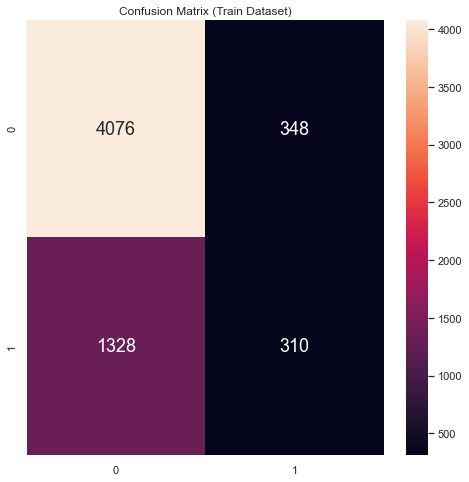

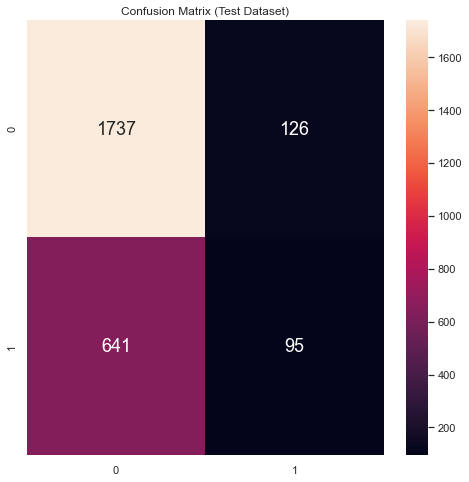

In [116]:
# test model performance with K-Fold Cross Validation (k=5)
model_performance(linear_svc, X_train, X_test, y_train, y_test)

**Conclusion:**
- Worst performance among all models
  - Low classification accuracy (~72%)
  - Extremely low TPR (~40%) for both train and test dataset
  - Extremely low Precision, Recall, and f1_score for both train and test dataset (f1 score ~0.2)
  
**Not a good model for this dataset!!**

**Reason for change:**
- Why use LinearSVC instead of SVC:
  - Large dataset, with many rows and features (>300 features) → Using SVC would be too slow
  - Highly dimensional space
- LinearSVC (Bad):
  - SVMs have been reported to work better for text classification --> Thus, how model that classifies based on features does not work that well
  - A major downside of SVMs is that they can be painfully inefficient to train.


---
# Comparing different models

In [117]:
results_acc = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Random Forest V1', 'Random Forest V2', 
              'Random Forest V3', 'Random Forest V4', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_random_forest_v1, acc_random_forest_v2, 
              acc_random_forest_v3, acc_random_forest_v4, acc_decision_tree]})

result_acc_df = results_acc.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_acc_df

,Model,Score
0,Random Forest V4,89.15
1,Random Forest V2,88.76
2,Random Forest V1,88.00
3,Random Forest V3,87.88
4,Decision Tree,84.22
5,Support Vector Machines,71.91


# We will use `random_forest_v4 model`
**Among Random Forest model versions:**
- Best performance metrics scores on test dataset among all versions
- And performance speed is between v1 and v2

**Among all models:**
- Best performance accuracy on test dataset

<br>

### Important features:
1. average_episode_duration
2. num_episodes
3. source_manga
4. rating_pg_13
5. media_type_movie

### Best Hyperparameter:

{`'criterion'`: 'entropy',<br>
 `'min_samples_leaf'`: 1,<br>
 `'min_samples_split'`: 4,<br>
 `'n_estimators'`: 700}

### Performance:
- Around 89% accuracy with relatively fast performance speed
- Good ROC-AUC score (~0.95) and good performance consistency (low s.d.) on test dataset
- High TPR, TNR: ~0.85
- High Precision, Recall, and f1_score (~0.75)
- High oob score (~88.7%)